# SHAP (SHapley Additive exPlanations)
#### Using SHAP to see feature contribution to the target variable
Works with any sklear tree-based model & XGBoost, LightGBM, CatBoost

Library documentation:   
https://shap.readthedocs.io/en/latest/  
https://github.com/slundberg/shap#citations

In [1]:
import shap
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

### Load data into dataframe

In [2]:
boston = load_boston()

# Create a Pandas dataframe with all the features
X = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
y = boston['target']

In [3]:
# lists what we can extract from the sklearn toy dataset
dir(boston) 

['DESCR', 'data', 'feature_names', 'filename', 'target']

### Random Forest 

In [4]:
# Split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [5]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
rf_train = rf_reg.score(Xtrain, ytrain)
rf_cv = cross_val_score(rf_reg, Xtrain, ytrain, cv=5).mean()
rf_test = rf_reg.score(Xtest, ytest)
print('Evaluation of the Random Forest performance\n')
print(f'Training score: {rf_train.round(4)}')
print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score: {rf_test.round(4)}')

Evaluation of the Random Forest performance

Training score: 0.9788
Cross validation score: 0.8396
Test score: 0.7989


### SHAP values

In [7]:
# Initialize JavaScript visualization
shap.initjs()

In [8]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X)

In [9]:
# shap force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [10]:
# SHAP values for all predictions
shap.force_plot(explainer.expected_value, shap_values, X)

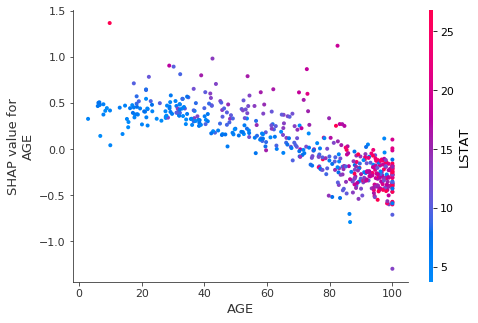

In [11]:
# Effect of a single feature on the shap value,and automatically selected other feature to show dependence 
shap.dependence_plot('AGE', shap_values, X)

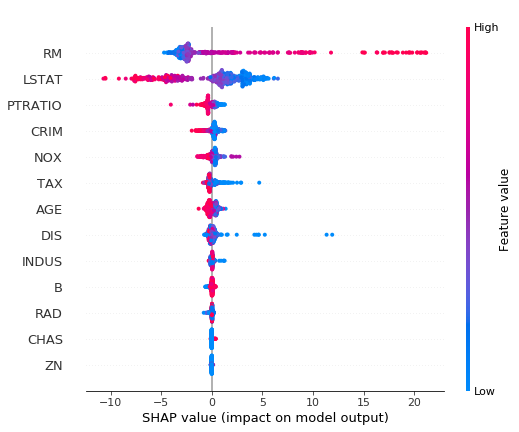

In [12]:
# See how every feaure contributes to the model output
shap.summary_plot(shap_values, X)

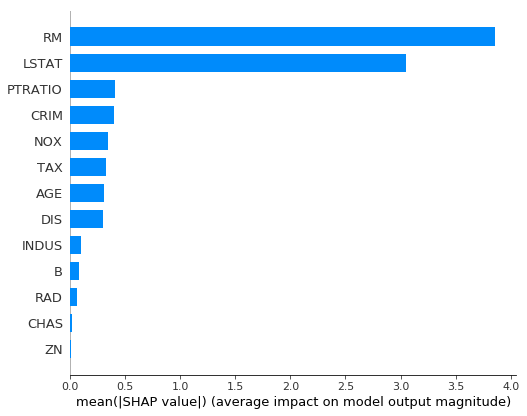

In [13]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu